In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [20]:
train = pd.read_csv("D:\\pyWork\\pyProject\\Finalprojects_DS\\Ride_Rating_Prediction\\train.csv")
train

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.00000,7.286660,7.177120,0,11,18,2,0.000000,17.375184,0,4,1
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.00000,1.258360,1.056640,0,4,1,1,0.000000,8.507064,0,4,1
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.00000,14.578200,14.440600,0,16,3,2,0.000000,19.745205,0,5,1
3,3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.00000,1.519110,1.186840,0,8,0,5,0.000000,10.968003,0,0,0
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.00000,11.093200,10.672400,0,19,1,4,0.000000,17.595398,0,5,1
5,5,57190176,650924,2017-09-08 14:41:22.000,1,1,0.00000,6.317710,5.459490,0,16,2,7,0.000000,13.676642,0,0,0
6,6,12257432,1308432,2017-09-08 15:32:02.000,1,1,0.00000,4.036700,3.782790,0,10,3,3,0.000000,10.968003,0,0,0
7,7,55498260,2020484,2017-09-08 15:39:12.000,2,1,0.00000,5.103300,4.655720,0,19,2,11,0.000000,13.865668,0,5,1
8,8,18333420,1994096,2017-09-08 15:49:28.000,2,1,0.00000,11.075100,9.937430,0,28,9,11,0.000000,19.251349,0,0,0
9,9,54548632,1812244,2017-09-08 16:29:12.000,2,1,0.00000,1.846860,1.680920,0,5,3,1,0.000000,10.968003,0,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51083 entries, 0 to 51082
Data columns (total 18 columns):
Unnamed: 0                         51083 non-null int64
customer_id                        51083 non-null int64
driver_id                          51083 non-null int64
creation_date                      51083 non-null object
booking_source                     51083 non-null int64
car_type                           51083 non-null int64
estimated_distance                 51083 non-null float64
distance_travelled                 51083 non-null float64
distance_travelled_while_moving    51083 non-null float64
estimated_duration                 51083 non-null int64
duration_time                      51083 non-null int64
wait_time_initial                  51083 non-null int64
wait_time_in_journey               51083 non-null int64
estimated_price                    51083 non-null float64
price                              51083 non-null float64
is_cancelled                       51083

In [4]:
#removed the entry where the ratings of ride is not given
trainupdated = train.drop(train[train.rating ==0].index)
trainupdated

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0000,7.286660,7.177120,0,11,18,2,0.000000,17.375184,0,4,1
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0000,1.258360,1.056640,0,4,1,1,0.000000,8.507064,0,4,1
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0000,14.578200,14.440600,0,16,3,2,0.000000,19.745205,0,5,1
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0000,11.093200,10.672400,0,19,1,4,0.000000,17.595398,0,5,1
7,7,55498260,2020484,2017-09-08 15:39:12.000,2,1,0.0000,5.103300,4.655720,0,19,2,11,0.000000,13.865668,0,5,1
10,10,22667372,1854468,2017-09-08 17:17:22.000,2,1,0.0000,4.613120,4.182770,0,15,3,7,0.000000,12.230710,0,4,1
11,11,60007004,2069088,2017-09-08 17:34:09.000,1,1,0.0000,4.283940,3.571940,0,14,4,6,0.000000,11.235214,0,5,1
12,12,54628120,1927652,2017-09-08 19:49:44.000,1,1,0.0000,2.852560,2.584810,0,7,7,1,0.000000,9.168639,0,5,1
13,13,20556788,1614776,2017-09-08 21:37:45.000,1,1,3.2590,3.266530,3.168380,5,6,0,0,10.968003,10.968003,0,5,1
14,14,25861980,1883448,2017-09-08 21:44:41.000,1,1,0.0000,5.477850,5.197660,0,14,0,4,0.000000,12.561356,0,3,1


In [5]:
trainupdated.describe()

,Unnamed: 0,customer_id,driver_id,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
count,34877.000000,3.487700e+04,3.487700e+04,34877.000000,34877.000000,34877.000000,34877.000000,34877.000000,34877.000000,34877.000000,34877.000000,34877.000000,34877.000000,34877.000000,34877.0,34877.000000,34877.0
mean,25673.270751,3.676126e+07,1.585306e+06,1.503369,1.102618,0.960911,6.898602,6.362686,2.064082,16.632824,2.153454,6.264874,1.790344,13.691821,0.0,4.779367,1.0
std,14729.191484,1.828623e+07,4.455360e+05,0.505017,0.426826,4.534309,6.382126,6.209661,6.555190,13.745504,2.636636,8.918157,5.533916,4.498040,0.0,0.695850,0.0
min,0.000000,4.092000e+05,5.093000e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.000000,0.000000,3.012757,0.0,1.000000,1.0
25%,12884.000000,2.042855e+07,1.306108e+06,1.000000,1.000000,0.000000,3.396080,3.001890,0.000000,9.000000,0.000000,2.000000,0.000000,10.884716,0.0,5.000000,1.0
50%,25878.000000,3.926080e+07,1.724680e+06,2.000000,1.000000,0.000000,5.451790,4.941910,0.000000,14.000000,1.000000,4.000000,0.000000,12.723303,0.0,5.000000,1.0
75%,38409.000000,5.351800e+07,1.957516e+06,2.000000,1.000000,0.000000,8.544960,7.892580,0.000000,21.000000,3.000000,8.000000,0.000000,16.195273,0.0,5.000000,1.0
max,51082.000000,6.387178e+07,2.203308e+06,4.000000,6.000000,347.556000,325.504000,324.568000,232.000000,666.000000,45.000000,524.000000,72.522902,50.540852,0.0,5.000000,1.0


In [6]:
trainupdated.set_index('customer_id')

,Unnamed: 0,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
customer_id,,,,,,,,,,,,,,,,,
52400320,0,1838640,2017-09-08 11:32:05.000,1,1,0.0000,7.286660,7.177120,0,11,18,2,0.000000,17.375184,0,4,1
29858456,1,1793472,2017-09-08 12:42:33.000,1,1,0.0000,1.258360,1.056640,0,4,1,1,0.000000,8.507064,0,4,1
30828968,2,1726788,2017-09-08 12:46:42.000,2,1,0.0000,14.578200,14.440600,0,16,3,2,0.000000,19.745205,0,5,1
59503764,4,2063752,2017-09-08 14:18:47.000,2,1,0.0000,11.093200,10.672400,0,19,1,4,0.000000,17.595398,0,5,1
55498260,7,2020484,2017-09-08 15:39:12.000,2,1,0.0000,5.103300,4.655720,0,19,2,11,0.000000,13.865668,0,5,1
22667372,10,1854468,2017-09-08 17:17:22.000,2,1,0.0000,4.613120,4.182770,0,15,3,7,0.000000,12.230710,0,4,1
60007004,11,2069088,2017-09-08 17:34:09.000,1,1,0.0000,4.283940,3.571940,0,14,4,6,0.000000,11.235214,0,5,1
54628120,12,1927652,2017-09-08 19:49:44.000,1,1,0.0000,2.852560,2.584810,0,7,7,1,0.000000,9.168639,0,5,1
20556788,13,1614776,2017-09-08 21:37:45.000,1,1,3.2590,3.266530,3.168380,5,6,0,0,10.968003,10.968003,0,5,1


In [7]:
#from this description we can conclude that average rating is 4.779367, with minimum and maximum rating of 1 & 5, respectively.
#the standard deviation is 0.69

In [8]:
#now the training set is of 34877 rides and the test set in which we have to predict the rating 

In [9]:
#speedy rides
trainupdated[['distance_travelled_while_moving','duration_time','rating']]

,distance_travelled_while_moving,duration_time,rating
0,7.177120,11,4
1,1.056640,4,4
2,14.440600,16,5
4,10.672400,19,5
7,4.655720,19,5
10,4.182770,15,4
11,3.571940,14,5
12,2.584810,7,5
13,3.168380,6,5
14,5.197660,14,3


In [10]:
trainupdated['Average speed'] = trainupdated['distance_travelled']/trainupdated['duration_time']
trainupdated[['Average speed','rating']]

,Average speed,rating
0,0.662424,4
1,0.314590,4
2,0.911138,5
4,0.583853,5
7,0.268595,5
10,0.307541,4
11,0.305996,5
12,0.407509,5
13,0.544422,5
14,0.391275,3


In [24]:
# Rides taken by each customer
trainupdated['customer_id'].astype('category').value_counts()

35765052    96
40079616    90
54869560    88
3414552     86
59705824    84
7487028     83
8850476     79
43142700    75
33652960    75
20556788    68
11453656    67
18429852    66
18959544    66
42426920    65
5413188     65
37904636    65
47366980    64
44531396    64
57105392    58
11038732    58
32891208    57
52141304    57
15968508    57
21901176    56
35535932    55
30231832    55
10636704    55
46552332    55
54055764    54
9701860     54
            ..
46980016     1
46978532     1
47560768     1
47566496     1
47614216     1
47634860     1
48167232     1
48116076     1
48113712     1
48087868     1
48083404     1
48045228     1
47952532     1
47948452     1
47948116     1
47888904     1
47870640     1
47865244     1
47862400     1
47772860     1
47766196     1
47761516     1
47754004     1
47722476     1
47708624     1
47674896     1
47644940     1
47644644     1
47641040     1
409200       1
Name: customer_id, Length: 6436, dtype: int64

In [26]:
trainupdated['car_type'].astype('category').value_counts()

1    32852
3     1531
2      484
4        8
6        1
5        1
Name: car_type, dtype: int64

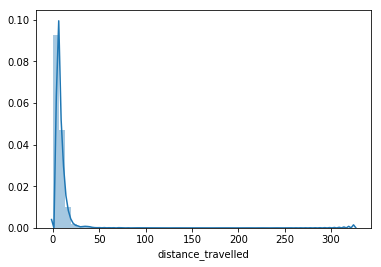

In [29]:
import seaborn as sns
sns.distplot(trainupdated['distance_travelled'])
plt.show()

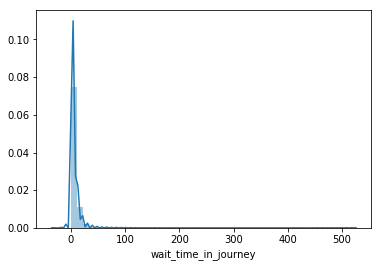

In [34]:
import seaborn as sns
sns.distplot(trainupdated['wait_time_in_journey'])
plt.show()

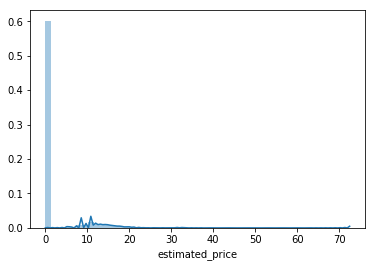

In [35]:
import seaborn as sns
sns.distplot(trainupdated['estimated_price'])
plt.show()

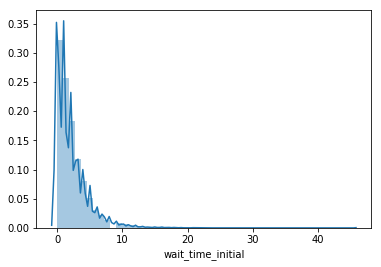

In [36]:
import seaborn as sns
sns.distplot(trainupdated['wait_time_initial'])
plt.show()

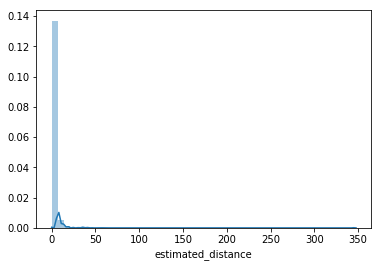

In [37]:
import seaborn as sns
sns.distplot(trainupdated['estimated_distance'])
plt.show()

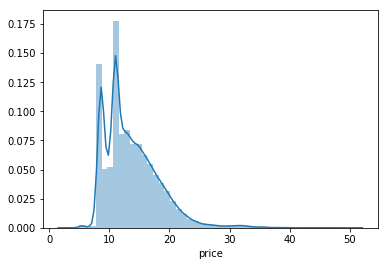

In [38]:
import seaborn as sns
sns.distplot(trainupdated['price'])
plt.show()

In [30]:
trainupdated['distance_travelled'].mean()

6.89860236842771

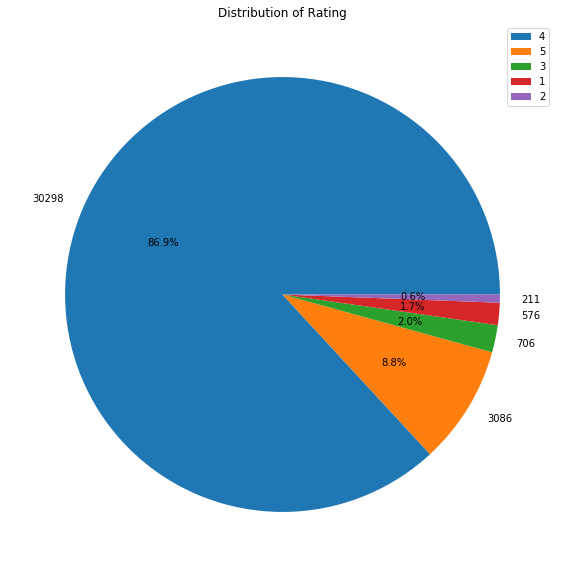

In [32]:
plt.figure(figsize=(25,10))

#plot 1
plt.subplot(1,2,1)
labels=trainupdated['rating'].unique()
plt8 = trainupdated['rating'].value_counts().tolist()
plt.title('Distribution of Rating')
plt.pie(plt8, labels=plt8, autopct='%1.1f%%')
plt.legend(labels, loc=1)

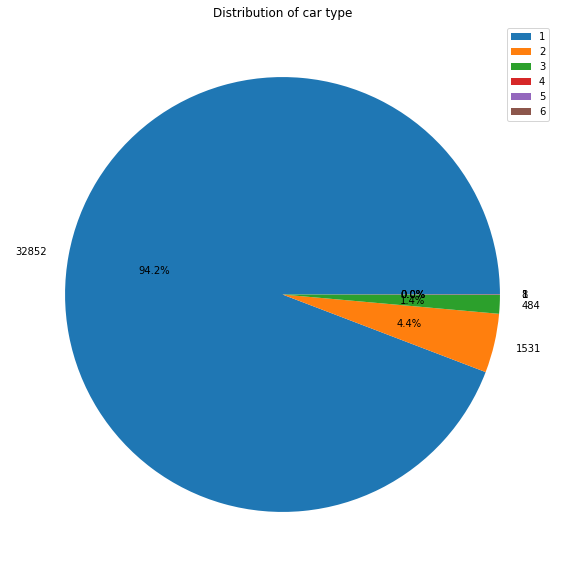

In [33]:
plt.figure(figsize=(25,10))

#plot 1
plt.subplot(1,2,1)
labels=trainupdated['car_type'].unique()
plt8 = trainupdated['car_type'].value_counts().tolist()
plt.title('Distribution of car type')
plt.pie(plt8, labels=plt8, autopct='%1.1f%%')
plt.legend(labels, loc=1)

In [41]:
"""
Variables to be taken for analysis (Based on Visualization) :
                    
booking_source                 
car_type                       
estimated_distance             
distance_travelled             
distance_travelled_while_moving
estimated_duration  
duration_time       
wait_time_initial   
wait_time_in_journey
estimated_price
price       
is_cancelled
rating   
was_rated
Average speed

"""


'\nVariables to be taken for analysis (Based on Visualization) :\n\ncustomer_id                    \ndriver_id                      \nbooking_source                 \ncar_type                       \nestimated_distance             \ndistance_travelled             \ndistance_travelled_while_moving\nestimated_duration  \nduration_time       \nwait_time_initial   \nwait_time_in_journey\nestimated_price\nprice       \nis_cancelled\nrating   \nwas_rated\nAverage speed\n\n'

In [75]:

def scatterplot(df,var):
    
    plt.scatter(df[var],df['rating'])
    plt.xlabel(var); plt.ylabel('rating')
    plt.title('Scatter Plot for '+var+' vs Rating')

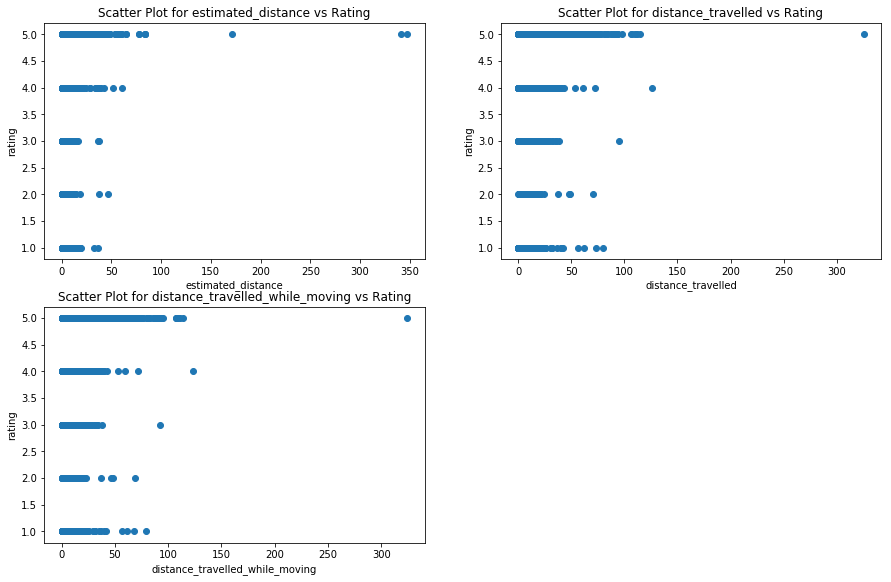

<Figure size 432x288 with 0 Axes>

In [76]:
#1. Car Distance

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
scatterplot(trainupdated,'estimated_distance')    
plt.subplot(4,2,2)
scatterplot(trainupdated,'distance_travelled')
plt.subplot(4,2,3)
scatterplot(trainupdated,'distance_travelled_while_moving')
plt.show()
plt.tight_layout()


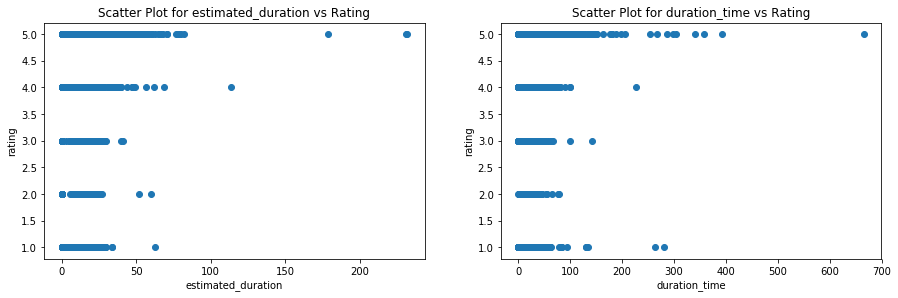

<Figure size 432x288 with 0 Axes>

In [77]:
#2. Ride Duration

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
scatterplot(trainupdated,'estimated_duration')    
plt.subplot(4,2,2)
scatterplot(trainupdated,'duration_time')
plt.show()
plt.tight_layout()


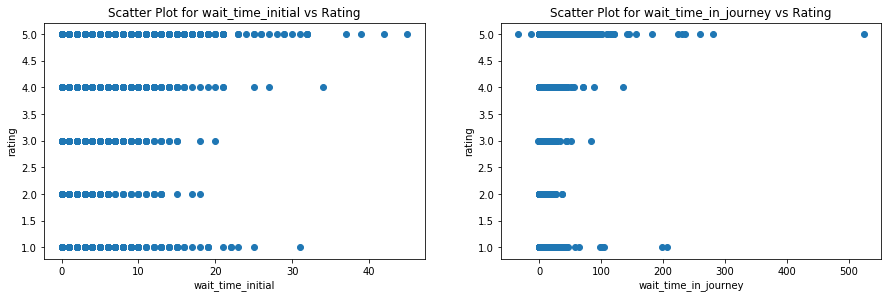

<Figure size 432x288 with 0 Axes>

In [78]:
#3. Wait Time

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
scatterplot(trainupdated,'wait_time_initial')    
plt.subplot(4,2,2)
scatterplot(trainupdated,'wait_time_in_journey')
plt.show()
plt.tight_layout()

In [67]:
trainupdated.corr()

,Unnamed: 0,customer_id,driver_id,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated,Average speed,expected_price
Unnamed: 0,1.000000,0.003915,0.030178,-0.001852,0.012409,-0.002592,-0.038985,-0.035884,0.005540,-0.046287,-0.022470,-0.043388,-0.008755,-0.093917,NaN,0.013068,NaN,0.006562,0.002288
customer_id,0.003915,1.000000,0.044717,-0.180458,0.059116,-0.020878,0.002138,-0.001208,-0.036474,0.019281,-0.028077,0.025619,-0.028183,-0.009568,NaN,-0.046705,NaN,-0.036137,-0.031097
driver_id,0.030178,0.044717,1.000000,-0.033156,-0.061219,-0.021401,-0.029643,-0.031319,-0.034677,-0.016601,-0.031872,-0.006271,-0.027432,-0.046303,NaN,0.002861,NaN,-0.053468,-0.030220
booking_source,-0.001852,-0.180458,-0.033156,1.000000,-0.025747,-0.000786,0.038185,0.037745,0.008540,0.033284,0.060746,0.018347,-0.005724,0.069726,NaN,0.001911,NaN,0.031471,0.004884
car_type,0.012409,0.059116,-0.061219,-0.025747,1.000000,0.074505,0.020349,0.021533,0.106544,0.005245,-0.001916,-0.011578,0.080945,-0.039621,NaN,-0.024266,NaN,0.025828,0.096550
estimated_distance,-0.002592,-0.020878,-0.021401,-0.000786,0.074505,1.000000,0.381389,0.389075,0.869054,0.191162,0.021880,0.034860,0.667485,0.227980,NaN,-0.007260,NaN,0.156388,0.953259
distance_travelled,-0.038985,0.002138,-0.029643,0.038185,0.020349,0.381389,1.000000,0.996493,0.275945,0.729083,0.088853,0.374152,0.186254,0.853811,NaN,-0.021951,NaN,0.381450,0.329664
distance_travelled_while_moving,-0.035884,-0.001208,-0.031319,0.037745,0.021533,0.389075,0.996493,1.000000,0.279506,0.682437,0.087876,0.313030,0.189087,0.835252,NaN,-0.020594,NaN,0.423675,0.335085
estimated_duration,0.005540,-0.036474,-0.034677,0.008540,0.106544,0.869054,0.275945,0.279506,1.000000,0.148171,0.004979,0.027486,0.830951,0.178631,NaN,-0.013979,NaN,0.122570,0.977915
duration_time,-0.046287,0.019281,-0.016601,0.033284,0.005245,0.191162,0.729083,0.682437,0.148171,1.000000,0.072476,0.878545,0.093752,0.781181,NaN,-0.026316,NaN,-0.089902,0.171258


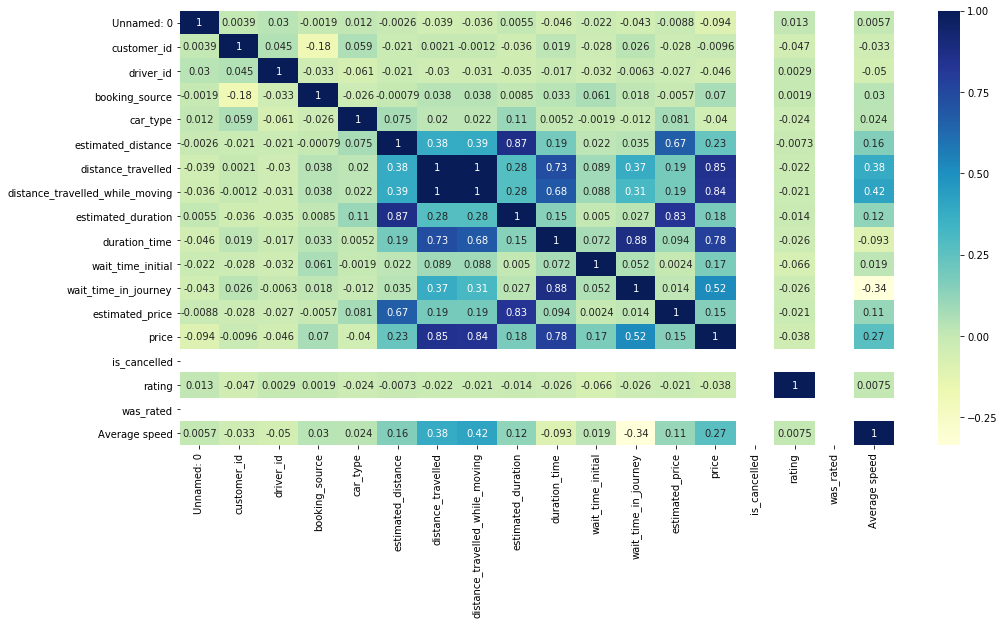

In [86]:
# correlation matrix
cor = trainupdated.corr()
cor

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Unnamed: 0                             weak negative
customer_id                            weak negative
driver_id                              weak negative
booking_source                         weak positive
car_type                               weak negative
estimated_distance                 moderate positive
distance_travelled                   strong positive
distance_travelled_while_moving      strong positive
estimated_duration                     weak positive
duration_time                        strong positive
wait_time_initial                      weak positive
wait_time_in_journey                 strong positive
estimated_price                        weak positive
price                                strong positive
is_cancelled                         strong positive
rating                                 weak negative
was_rated                            strong positive
Average speed                      moderate positive
Name: correlation, dtype: object

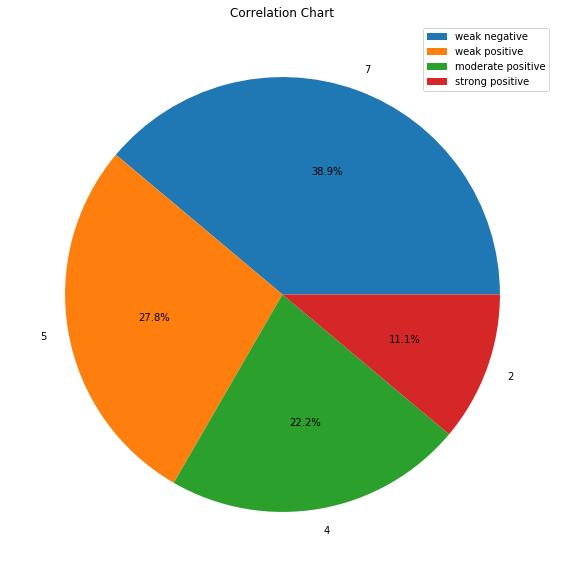

In [71]:
#Correlation with price(target variable) for numeric data
    
corr=trainupdated.corr().round(3).loc['price']
corr=pd.DataFrame(corr)
corr
result=[]
    
for i in corr['price']:
        if (i>-1 and i<-0.4): result.append('strong negative')
        elif (i>-0.4 and i<-0.2): result.append('moderate negative')
        elif (i>-0.2 and i<0): result.append('weak negative')
        elif(i>0 and i<0.2): result.append('weak positive')
        elif(i>0.2 and i<0.5): result.append('moderate positive')
        else : result.append('strong positive')
    
corr['correlation']=result
corr['correlation'].value_counts()

plt.figure(figsize=(10,10))
plt.title('Correlation Chart')
labels=corr['correlation'].unique()
plt15 = corr['correlation'].value_counts().tolist()
plt.pie(plt15, labels=plt15, autopct='%1.1f%%')
plt.legend(labels, loc=1)

corr.loc[:,'correlation']

Regression coefficient: 0.9576508568847656


In [79]:
#Logistic Regression
model = LogisticRegression(random_state =0)
x_train = trainupdated[['booking_source', 'car_type', 'duration_time', 'distance_travelled_while_moving', 'price']]
y_train = trainupdated['rating']
model.fit(x_train, y_train)

C:\Users\Asus_Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus_Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
y_pred_train = model.predict(x_train)
model.score(x_train, y_train)

0.8686813659431717

In [92]:
test = pd.read_csv("D:\\pyWork\\pyProject\\Finalprojects_DS\\Ride_Rating_Prediction\\test.csv")
test

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled
0,0,60956364,1761208,2017-09-08 15:11:09.000,1,1,0.0000,14.580900,13.63340,0,35,0,14,0.000000,20.581726,0
1,1,60777268,1863028,2017-09-08 15:17:00.000,2,1,0.0000,3.116650,2.78458,0,9,1,3,0.000000,10.968003,0
2,2,55197228,1362580,2017-09-08 20:54:56.000,1,1,0.0000,8.157720,7.48073,0,16,0,5,0.000000,15.186146,0
3,3,53877020,1917600,2017-09-09 07:15:20.000,2,1,0.0000,9.101100,8.39143,0,29,2,14,0.000000,17.724573,0
4,4,12747160,2063780,2017-09-09 10:38:21.000,2,1,0.0000,16.022800,15.32200,0,57,1,34,0.000000,23.929555,0
5,5,9840836,1570728,2017-09-09 11:25:27.000,2,1,0.0000,5.856460,5.52733,0,13,1,4,0.000000,12.942017,0
6,6,53685780,1867276,2017-08-28 11:59:09.000,1,1,0.0000,13.392700,12.36570,0,36,2,17,0.000000,20.658027,0
7,7,7933116,1776092,2017-08-28 12:20:54.000,2,1,0.0000,9.521690,8.69425,0,22,3,7,0.000000,16.647935,0
8,8,24668848,1997088,2017-08-28 14:54:51.000,2,1,0.0000,9.287290,8.54989,0,24,1,9,0.000000,17.845798,0
9,9,45158536,1121816,2017-08-28 19:06:16.000,2,1,0.0000,1.736590,1.59362,0,5,2,1,0.000000,10.968003,0


In [95]:
x_test = trainupdated[['booking_source', 'car_type', 'duration_time', 'distance_travelled_while_moving', 'price']]
y_pred_test = model.predict(x_train)
y_pred_test

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model1 =RandomForestClassifier(random_state =0)
model1.fit(x_train, y_train)

C:\Users\Asus_Owner\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [82]:
y_pred_train = model1.predict(x_train)
model1.score(x_train,y_train)

0.9864380537316857

In [88]:
print("Regression coefficient:",model.score(x_train,y_pred_train))

Regression coefficient: 0.8779998279668549
